In [70]:
import numpy as np
import pandas as pd
import scipy.stats as ss
np.random.randint(1,7)

6

In [71]:
few_rolls = np.random.randint(1,7, size = 10)
many_rolls = np.random.randint(1,7, size = 100)
print(few_rolls, many_rolls)

[2 6 4 3 2 3 5 3 2 6] [6 3 2 5 3 3 1 4 1 1 2 3 1 1 5 5 6 1 3 3 5 6 5 1 4 4 6 2 3 1 1 5 5 6 1 4 1
 2 1 6 4 5 5 3 5 1 4 5 1 4 4 2 6 1 4 2 3 5 2 4 6 4 3 1 6 4 6 6 3 5 1 4 2 1
 2 5 1 6 3 1 3 6 1 6 3 2 2 3 5 2 4 2 1 5 4 2 6 6 3 5]


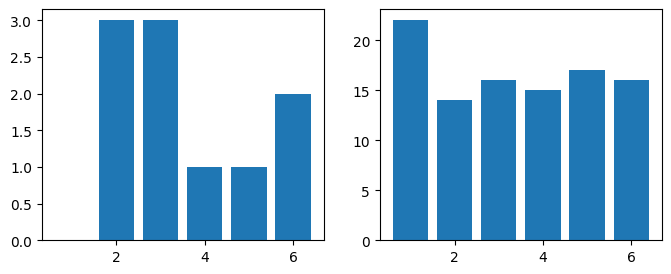

In [72]:
import matplotlib.pyplot as plt
few_counts = np.histogram(few_rolls , bins = np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls , bins = np.arange(.5,7.5))[0]

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (8,3))
ax1.bar(np.arange(1,7),few_counts)
ax2.bar(np.arange(1,7),many_counts);
                      

(0.0, 55.0)

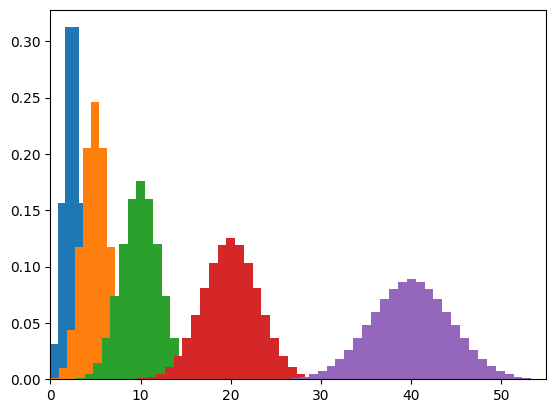

In [73]:

b = ss.distributions.binom
for flips in [5,10,20,40,80]:
  #binomial with .5 is result of many coin flips
  success = np.arange(flips)
  our_distribution = b.pmf(success , flips , .5)
  plt.hist(success , flips , weights = our_distribution)
plt.xlim(0,55)

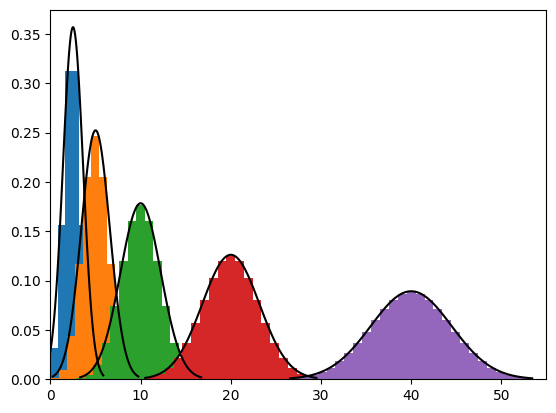

In [74]:
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5,10,20,40,80]:
#binomial coin flip
  success = np.arange(flips)
  our_distributions = b.pmf(success , flips , .5)
  plt.hist(success , flips , weights = our_distributions)

  #normal approximation to that binomial 
  #we have to set the mean and standard deviation  
  mu = flips * 0.5 ,
  std_dev = np.sqrt(flips * .5 * (1-0.5))

  #we have to set up both the x and y points for the normal 
  #we get the Ys from the distribution (a function)
  #we have to feed it Xs , we set those up here 
  norm_x = np.linspace(mu - 3*std_dev , mu+3*std_dev , 100)
  norm_y = n.pdf(norm_x , mu ,std_dev)
  plt.plot(norm_x ,norm_y , 'k');
plt.xlim(0,55);

In [75]:
#Linear Combinations,Weighted Sums , dot Products

In [76]:
#pure python , old school
quantity =[2,12,3]
costs = [12.5 , 0.5 , 1.75]

partial_costs= []
for q,c in zip (quantity , costs) :
    partial_costs.append(q*c)
sum(partial_costs)

36.25

In [77]:
#pure python , for new school cool kids
quantity = [2,20,15]
cost = [30 , 5,3]
sum(q*c for q,c in zip (quantity ,cost))

205

In [78]:
quantity = np.array([2, 15 ,20])
cost =np.array([30 , 5, 3])
np.sum(quantity*cost)#element wise multiplication

np.int64(195)

In [79]:
print(quantity.dot(cost) , np.dot (quantity, cost), quantity @ cost , sep='\n')

195
195
195


In [80]:
for q_i ,c_i in zip (quantity , cost):
    print("{:2d} {:5.2f} --> {:5.2f}" . format (q_i , c_i , q_i * c_i))
print ("Total : " , sum (q*c for q,c in zip (quantity , cost)))

 2 30.00 --> 60.00
15  5.00 --> 75.00
20  3.00 --> 60.00
Total :  195


In [81]:
#Weighted Average 
values = np.array([10.0 , 20.0 , 30.0])
weights = np.full_like(values , 1/3)

print("weights : ", weights)
print("via mean : ", np.mean(values))
print("via weights and dot : ", np.dot(weights,values))

weights :  [0.33333333 0.33333333 0.33333333]
via mean :  20.0
via weights and dot :  20.0


In [82]:
values = np.array([10,20,30])
weights = np.array([0.5 , 0.25 , 0.25])
np.dot(weights , values)

np.float64(17.5)

In [83]:
payoffs = np.array([1.0 ,-0.5])
probs = np.array([0.5,0.5])
np.dot (payoffs ,probs)


np.float64(0.25)

In [84]:
def is_even(n):
    #if value is 0 , no. is even
    return n%2==0
winnings = 0.0
for toss_ct in range (1000):
    die_toss = np.random.randint(1,7)
    winnings += 1.0 if is_even(die_toss) else -0.5
print(winnings)

221.5


In [85]:
#sum of squares
values = np.array([5,-3,2,1])
squares = values*values 
print(squares , np.sum(squares),np.dot(values,values), sep = "\n")

[25  9  4  1]
39
39


In [86]:
#sum  of squared errors
errors = np.array([5,-5,3.2,-1.1])
display(pd.DataFrame({'errors':errors, 'squared':errors*errors}))

,errors,squared
0,5.0,25.00
1,-5.0,25.00
2,3.2,10.24
3,-1.1,1.21


In [87]:
np.dot(errors,errors)

np.float64(61.45)

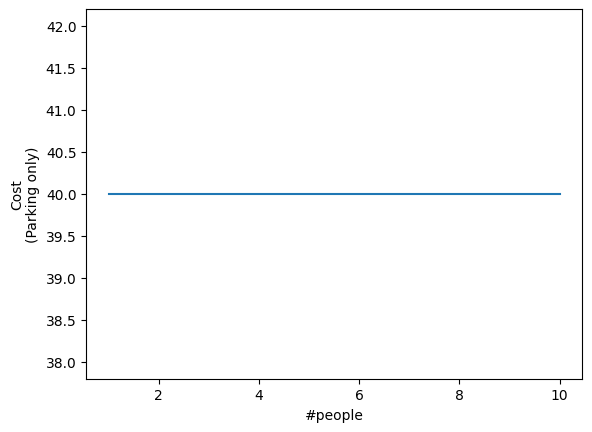

In [88]:
#Lines
people = np.arange(1,11)
total_cost =np.ones_like(people)*40.0

ax = plt.gca()

ax.plot(people,total_cost)
ax.set_xlabel("#people")
ax.set_ylabel("Cost\n(Parking only)");


In [89]:
people = np.arange(1,11)
total_cost = 80.0 * people + 40

In [90]:
#.T transpose to save vertical spaces in printout
display(pd.DataFrame({'total_cost' : total_cost.astype(np.int)},index = people).T)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

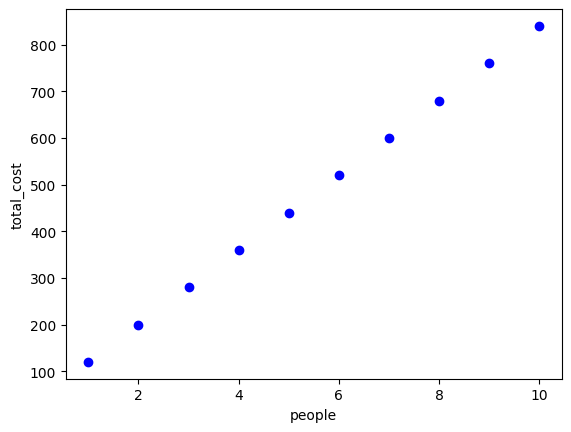

In [92]:
ax = plt.gca()
ax.plot(people, total_cost , 'bo')
ax.set_ylabel("total_cost")
ax.set_xlabel("people");